# Table of Contents
 <p><div class="lev1 toc-item"><a href="#一元线性回归" data-toc-modified-id="一元线性回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>一元线性回归</a></div><div class="lev2 toc-item"><a href="#披萨价格与直径的关系" data-toc-modified-id="披萨价格与直径的关系-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>披萨价格与直径的关系</a></div><div class="lev2 toc-item"><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear regression model</a></div><div class="lev2 toc-item"><a href="#prediction" data-toc-modified-id="prediction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>prediction</a></div><div class="lev2 toc-item"><a href="#Regression-line" data-toc-modified-id="Regression-line-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Regression line</a></div><div class="lev2 toc-item"><a href="#模型的残差" data-toc-modified-id="模型的残差-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>模型的残差</a></div><div class="lev2 toc-item"><a href="#参数估计" data-toc-modified-id="参数估计-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>参数估计</a></div><div class="lev2 toc-item"><a href="#模型评估" data-toc-modified-id="模型评估-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>模型评估</a></div><div class="lev1 toc-item"><a href="#多元线性回归" data-toc-modified-id="多元线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>多元线性回归</a></div><div class="lev1 toc-item"><a href="#多项式回归" data-toc-modified-id="多项式回归-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>多项式回归</a></div><div class="lev2 toc-item"><a href="#二次回归（Quadratic-Regression）" data-toc-modified-id="二次回归（Quadratic-Regression）-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>二次回归（Quadratic Regression）</a></div><div class="lev2 toc-item"><a href="#三次回归" data-toc-modified-id="三次回归-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>三次回归</a></div><div class="lev1 toc-item"><a href="#Plots-(4-models)" data-toc-modified-id="Plots-(4-models)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plots (4 models)</a></div>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 一元线性回归

## 披萨价格与直径的关系

In [2]:
X = [[6], [8], [10], [14], [18]] # 直径
y = [[7], [9], [13], [17.5], [18]] # 价格
x_test = np.linspace(0,26,100) # 直径

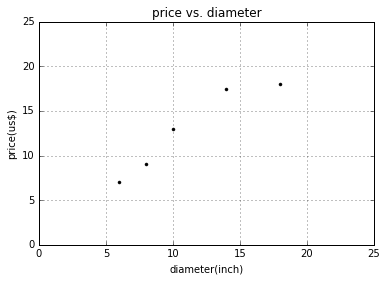

In [3]:
plt.figure()
plt.title('price vs. diameter')
plt.xlabel('diameter(inch)')
plt.ylabel('price(us$)')
plt.axis([0,25,0,25])
plt.grid(True)
plt.plot(X, y, 'k.');

## Linear regression model

In [4]:
model = LinearRegression()
model.fit(X, y)

/Users/alicefelix/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## prediction

In [5]:
model.predict(12)

array([[ 13.68103448]])

In [6]:
print('预测一张12寸的披萨价格为: {:.2f}$'.format(model.predict(12)[0][0]))

预测一张12寸的披萨价格为: 13.68$


## Regression line

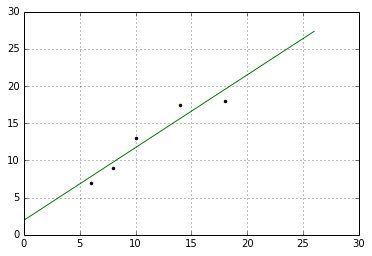

In [7]:
plt.figure()
plt.axis([0,30,0,30])
plt.grid(True)
plt.plot(X, y, 'k.')
yy = model.predict(x_test.reshape(x_test.shape[0], 1))
plt.plot(x_test, yy, 'g-');

## 模型的残差

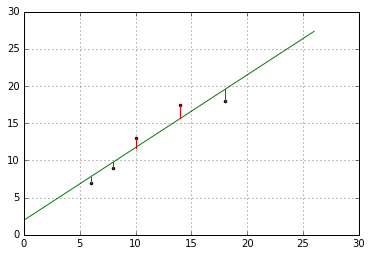

In [8]:
plt.figure()
plt.axis([0,30,0,30])
plt.grid(True)
plt.plot(X, y, 'k.')
plt.plot(x_test, yy, 'g-')
yr = model.predict(X) # 预测值
for idx, x in enumerate(X):
    plt.plot([x,x], [y[idx], yr[idx]], 'r-')


## 参数估计

通过残差的平方之和最小化实现最佳拟合

$$\beta = \frac{cov(x,y)}{var(x)}$$   
$$\alpha = \bar{y} - \beta \bar{x}$$       

In [9]:
xl = [6,8,10,14,18] # x as list
yl = [7,9,13,17.5,18] # y as list
yp = np.asarray([item for sublist in yr for item in sublist]) # predicted y
cov = np.cov(xl, yl)
# The 2x2 array returned by np.cov(a,b) has elements equal to
# cov(a,a)  cov(a,b)
# cov(a,b)  cov(b,b)

In [10]:
var_x = cov[0, 0]
cov_xy = cov[0, 1]
beta = cov_xy / var_x
alpha = np.mean(yl) - beta * np.mean(xl)
print("alpha = {:.2f}\nbeta = {:.2f}".format(alpha, beta))

alpha = 1.97
beta = 0.98


## 模型评估

coefficient of determination R^2 of the prediction. R方也叫确定系数，表示模型对现实数据拟合的程度

In [11]:
ss_tot = np.sum(np.power(yl - np.mean(yl), 2))
ss_res = np.sum(np.power(yl - yp, 2))
r2 = 1 - ss_res / ss_tot
r2

0.91000159642401024

In [12]:
model.score(X, y) 
# 说明测试集里面91%的价格都可以通过模型解释

0.91000159642401024

# 多元线性回归

匹萨的价格其实还会受到其他因素的影响。比如，匹萨的价格还与上面的辅料有关。   

$$y = \alpha + \beta_{1} x_{1} + \beta_{2} x_{2}$$   


In [13]:
ds = [6, 8, 10, 14, 18] # 直径
cs = [2, 1, 0, 2, 0] # 辅料种类 0， 1， 2
ps = [7, 9, 13, 17.5, 18] # 价格
y2 = []
for p in ps:
    y2.append([p])
X2 = []
for d, c in zip(ds, cs):
    X2.append([d,c])
x2_test = []
x2_test_d = [1, 5, 10, 15, 20, 25]
x2_test_c = [0, 2, 1, 1, 0, 2]
for d, c in zip(x2_test_d, x2_test_c):
    x2_test.append([d,c])

In [14]:
model2 = LinearRegression()
model2.fit(X2, y2)
yy2 = model2.predict(x2_test)

In [15]:
model2.score(X2, y2)

0.91533779149519889

# 多项式回归

多项式回归，一种特殊的多元线性回归方法，增加了指数项（ 的次数大于1）。现实世界中的曲线关系都是通过增加多项式实现的，其实现方式和多元线性回归类似

## 二次回归（Quadratic Regression）

即回归方程有个二次项，公式如下：

$$y = \alpha + \beta_{1} x + \beta_{2} x^2$$   

只用一个解释变量，但是模型有三项，通过第三项（二次项）来实现曲线关系。

In [16]:
quadratic_featurizer = PolynomialFeatures(degree = 2)
X_quadratic = quadratic_featurizer.fit_transform(X)
x_test_quadratic = quadratic_featurizer.transform(x_test.reshape(x_test.shape[0], 1))
reg_quadratic = LinearRegression()
reg_quadratic.fit(X_quadratic, y)
yy_quadratic = reg_quadratic.predict(x_test_quadratic)

## 三次回归

$$y = \alpha + \beta_{1} x + \beta_{2} x^2 ＋ \beta_{3} x^3$$ 

In [17]:
cubic_featurizer = PolynomialFeatures(degree = 3)
X_cubic = cubic_featurizer.fit_transform(X)
x_test_cubic = cubic_featurizer.transform(x_test.reshape(x_test.shape[0], 1))
reg_cubic = LinearRegression()
reg_cubic.fit(X_cubic, y)
yy_cubic = reg_cubic.predict(x_test_cubic)

# Plots (4 models)

一元回归R-squared = 0.91
二次回归R-squared = 0.98
三次回归R-squared = 0.99
多元回归R-squared = 0.92


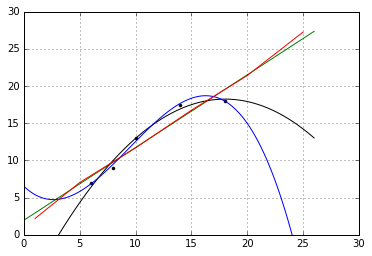

In [18]:
plt.figure()
plt.axis([0,30,0,30])
plt.grid(True)
plt.plot(X, y, 'k.')
plt.plot(x_test, yy, 'g-')
plt.plot(x_test, yy_quadratic, 'k-')
plt.plot(x_test, yy_cubic, 'b-')
plt.plot(x2_test_d, yy2, 'r-')
print("一元回归R-squared = {:.2f}".format(model.score(X, y)))
print("二次回归R-squared = {:.2f}".format(reg_quadratic.score(X_quadratic, y)))
print("三次回归R-squared = {:.2f}".format(reg_cubic.score(X_cubic, y)))
print("多元回归R-squared = {:.2f}".format(model2.score(X2, y2)))